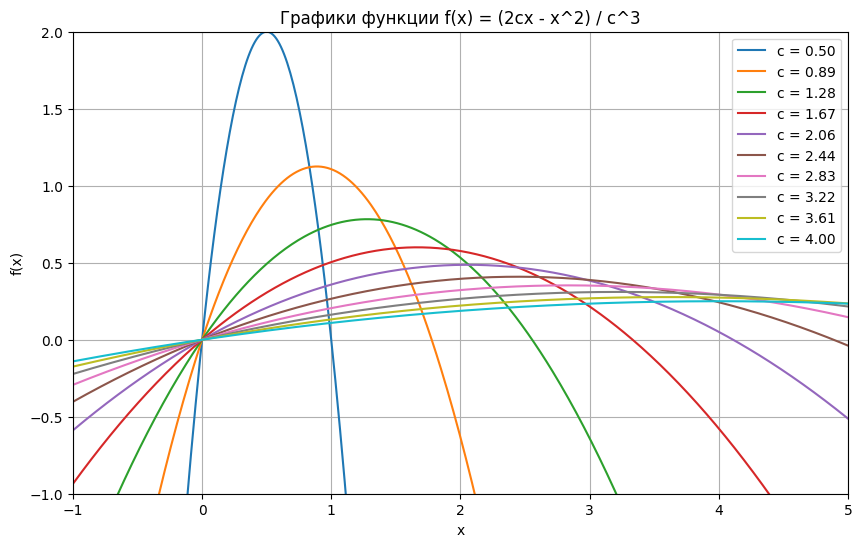

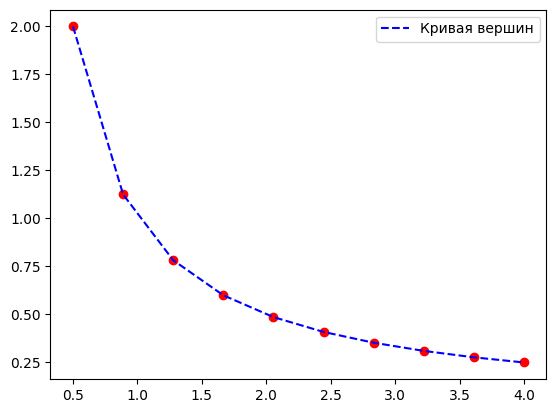

In [2]:
#1
import numpy as np
import matplotlib.pyplot as plt

def f(x, c):
  """
  Функция для вычисления f(x) = (2cx - x^2) / c^3

  Args:
    x: Значение x
    c: Параметр c

  Returns:
    Значение функции f(x)
  """
  return (2 * c * x - x**2) / c**3

# Список значений параметра c
c_values = np.linspace(0.5, 4, 10)

# Диапазон значений x
x = np.linspace(-1, 5, 500)

# Построение графиков для разных значений c
plt.figure(figsize=(10, 6))
for c in c_values:
  plt.plot(x, f(x, c), label=f'c = {c:.2f}')

# Настройка графика
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Графики функции f(x) = (2cx - x^2) / c^3')
plt.xlim([-1, 5])
plt.ylim([-1, 2])
plt.grid(True)
plt.legend()
plt.show()

# Нахождение и отображение вершин графиков
vertex_x = []
vertex_y = []
for c in c_values:
  x_vertex = c  # Вершина параболы находится в точке x = c
  y_vertex = f(x_vertex, c)
  vertex_x.append(x_vertex)
  vertex_y.append(y_vertex)
  plt.plot(x_vertex, y_vertex, 'ro')

# Построение кривой, проходящей через вершины
plt.plot(vertex_x, vertex_y, 'b--', label='Кривая вершин')
plt.legend()
plt.show()


# Доказательство:
# 1. Найдем точки пересечения графика с осью Ox: f(x) = 0
#    (2cx - x^2) / c^3 = 0  =>  x(2c - x) = 0  =>  x1 = 0, x2 = 2c
# 2. Площадь области находится интегрированием f(x) от 0 до 2c:
#    S = ∫(2cx - x^2) / c^3 dx от 0 до 2c = 4/3c 
#    Видно, что площадь области обратно пропорциональна c. 
#    Это подтверждает, что с увеличением c область сжимается по оси Oy.
# 3. Точки пересечения с осью Ox (0 и 2c) показывают, что с увеличением c, 
#    область растягивается по оси Ox.

# Предположение о кривой вершин:
# Кривая, соединяющая вершины графиков, является гиперболой.

# Уравнение кривой вершин:
# Подставляя x = c в формулу f(x), получаем:
# y = f(c, c) = (2c * c - c^2) / c^3 = c^2 / c^3 = 1/c^2
# Таким образом, уравнение кривой вершин: y = 1/x^2

Среднее значение функции f(x) на [0, 2]: 0.4000
Число c, такое что f(c) = f_s: 1.2068


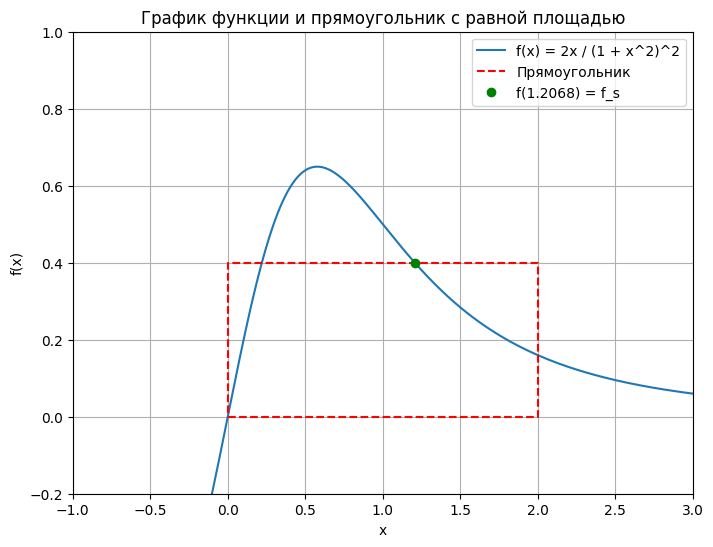

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def f(x):
    """
    Функция f(x) = 2x / (1 + x^2)^2
    """
    return 2 * x / (1 + x**2)**2

# Границы интегрирования
a = 0
b = 2

# Вычисление среднего значения функции f(x) на [a, b]
f_s = integrate.quad(f, a, b)[0] / (b - a)  # Use f_s for mean value
print(f"Среднее значение функции f(x) на [{a}, {b}]: {f_s:.4f}")

# Нахождение числа c, такого что f(c) = f_s
from scipy.optimize import fsolve
c = fsolve(lambda x: f(x) - f_s, 1)[0]  # Use f_s in the equation
print(f"Число c, такое что f(c) = f_s: {c:.4f}")

# Построение графика функции и прямоугольника
x = np.linspace(-1, 3, 500)

plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label='f(x) = 2x / (1 + x^2)^2')
plt.plot([a, b, b, a, a], [0, 0, f_s, f_s, 0], 'r--', label='Прямоугольник') 
plt.plot(c, f_s, 'go', label=f'f({c:.4f}) = f_s')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции и прямоугольник с равной площадью')
plt.xlim([-1, 3])
plt.ylim([-0.2, 1])
plt.grid(True)
plt.legend()
plt.show()

Шаг такой, что погрешность решения была не более 0.01: 0.0031


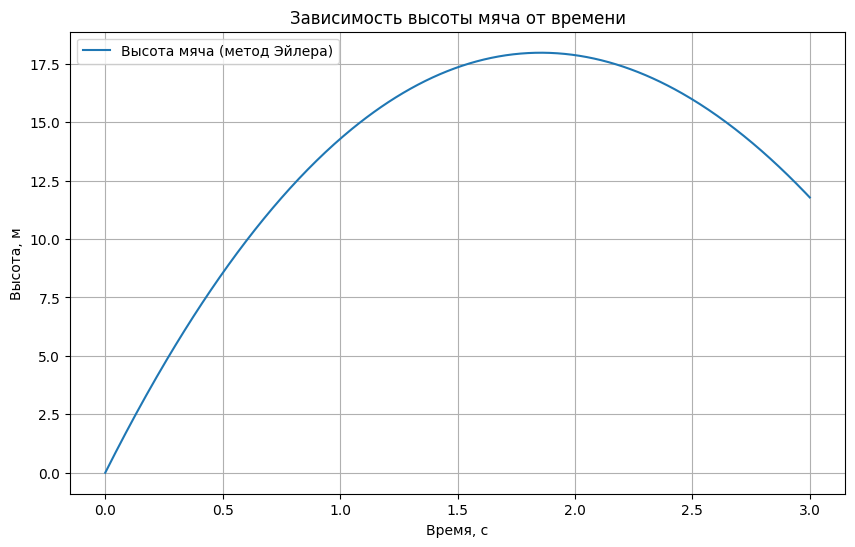

In [4]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы
m = 1.0  # Масса мяча, кг
v0 = 20.0  # Начальная скорость, м/с
g = 9.81  # Ускорение свободного падения, м/с^2
p = 0.1  # Коэффициент сопротивления воздуха (в 10 раз меньше скорости)

# Дифференциальное уравнение:
# m * dv/dt = -m * g - p * v(t)

# Для m = 1 кг, v0 = 20 м/с, p = 0.1:
# dv/dt = -9.81 - 0.1 * v(t)

# Точное решение дифференциального уравнения:
# v(t) = (v0 + (m * g) / p) * exp(-p * t / m) - (m * g) / p

# --- Численное решение методом Эйлера ---
def dvdt(t, v):
  """Правая часть дифференциального уравнения."""
  return -g - (p * v) / m

def euler_method(f, t0, v0, tn, h):
  t = np.arange(t0, tn + h, h)
  v = np.zeros(len(t))
  v[0] = v0
  for i in range(len(t) - 1):
    v[i + 1] = v[i] + h * f(t[i], v[i])
  return t, v

# --- Вычисление ошибки ---
def calculate_error(v_exact, v_euler):
  '''
  Вычисление максимальной абсолютной погрешности.
  '''
  return max(abs(v_exact - v_euler))

# --- Подбор шага для заданной точности ---
# Начинаем с шага 0.1 и уменьшаем его вдвое, пока ошибка не станет меньше 0.01
h = 0.1
t0 = 0
tn = 3
error = 1  # Начальное значение ошибки

while error > 0.01:
  t_euler, v_euler = euler_method(dvdt, t0, v0, tn, h)
  t_exact = np.linspace(t0, tn, len(t_euler)) # Для сравнения с численным решением
  v_exact = (v0 + (m * g) / p) * np.exp(-p * t_exact / m) - (m * g) / p
  error = calculate_error(v_exact, v_euler)
  h /= 2

print(f'Шаг такой, что погрешность решения была не более 0.01: {h:.4f}')

# --- Вычисление высоты ---
def get_y(t, v):
  '''
  Вычисление высоты y(t) по известной скорости v(t).
  y(t) = y0 + ∫v(t)dt от 0 до t, где y0 = 0 (начальная высота).

  Args:
    t: Массив времен
    v: Массив скоростей

  Returns:
    Массив высот y(t)
  '''
  y = np.zeros(len(t))
  for i in range(1, len(t)):
    y[i] = y[i - 1] + (v[i] + v[i - 1]) * (t[i] - t[i - 1]) / 2
  return y

# Вычисление высоты с помощью метода Эйлера
y_euler = get_y(t_euler, v_euler)

# --- Построение графика ---
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label='Высота мяча (метод Эйлера)')
plt.xlabel('Время, с')
plt.ylabel('Высота, м')
plt.title('Зависимость высоты мяча от времени')
plt.grid(True)
plt.legend()
plt.show()

Максимум функции в точке (5.1213, 5.1213) = 18120.9735
Минимум функции в точке (0.8787, 0.8787) = 2.7765


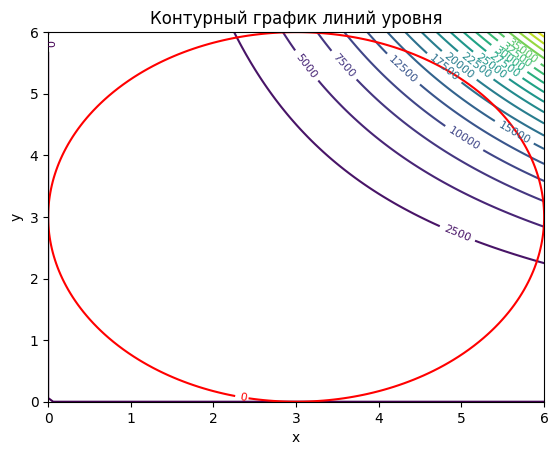

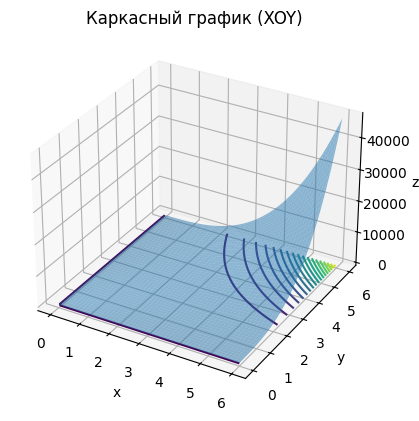

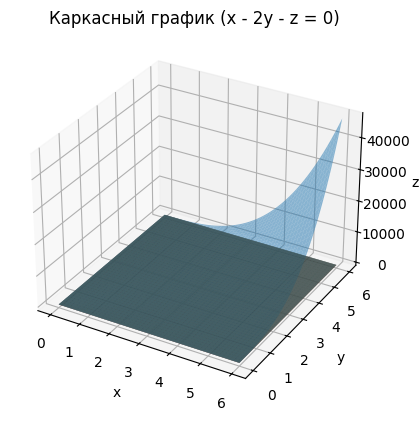

In [1]:
#4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

# Определение функции
def f(x, y):
    return x**3 * y**3 + 3*x*y

# Определение ограничения
def g(x, y):
    return (x - 3)**2 + (y - 3)**2 - 9

# Создание сетки значений x и y
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции и ограничения
Z = f(X, Y)
C = g(X, Y)

# Построение контурного графика линий уровня функции и ограничения
fig, ax = plt.subplots()
contour_f = ax.contour(X, Y, Z, levels=20)
contour_g = ax.contour(X, Y, C, levels=[0], colors='red')
ax.clabel(contour_f, inline=True, fontsize=8)
ax.clabel(contour_g, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Контурный график линий уровня')

# Приближенное определение координат точек экстремума
# по графику
x_max_approx = 4.2
y_max_approx = 4.2
x_min_approx = 1.8
y_min_approx = 1.8

# Определение функции Лагранжа
def L(args):
    x, y, l = args
    return f(x, y) + l * g(x, y)

# Вычисление частных производных функции Лагранжа
def grad_L(args):
    x, y, l = args
    dL_dx = 3*x**2 * y**3 + 3*y + 2*l*(x - 3)
    dL_dy = 3*x**3 * y**2 + 3*x + 2*l*(y - 3)
    dL_dl = g(x, y)
    return [dL_dx, dL_dy, dL_dl]

# Решение системы уравнений на стационарные точки
# с помощью метода Ньютона
x0 = [x_max_approx, y_max_approx, 0]
sol = fsolve(grad_L, x0)
x_max, y_max, l_max = sol

x0 = [x_min_approx, y_min_approx, 0]
sol = fsolve(grad_L, x0)
x_min, y_min, l_min = sol

# Вывод результатов
print(f"Максимум функции в точке ({x_max:.4f}, {y_max:.4f}) = {f(x_max, y_max):.4f}")
print(f"Минимум функции в точке ({x_min:.4f}, {y_min:.4f}) = {f(x_min, y_min):.4f}")

# Построение каркасного графика функции с линиями,
# параллельными плоскости XOY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=-100, levels=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (XOY)')

# Построение каркасного графика функции с линиями,
# параллельными плоскости x - 2y - z = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
for i in np.linspace(-50, 50, 10):
    ax.plot_surface(X, Y, X - 2*Y + i, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (x - 2y - z = 0)')

plt.show()

A) Стационарная точка: x = 9.0000, y = 4.0000
   Значение функции в стационарной точке: f(9.0000, 4.0000) = 30.0000

Б) f(25, 0) = 50.0000
   Значение f(25, 0) больше чем значение в стационарной точке.


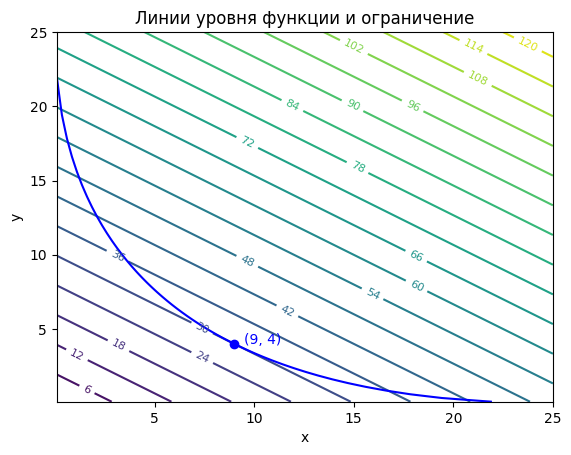

'\nМетод множителей Лагранжа не может найти максимум в этой задаче, \nпотому что он находит только стационарные точки внутри области определения. \nВ данном случае, максимум достигается на границе области, \nопределяемой условием √x + √y = 5. \n\nТочка (9, 4) особенная, так как в ней достигается максимум функции \nпри заданном ограничении.  Это можно увидеть на графике: \nлиния уровня, проходящая через точку (9, 4), \nкасается графика ограничения. \n\nМетод Лагранжа не может "увидеть" этот максимум, \nтак как он ищет точки, где градиенты функции и ограничения коллинеарны. \nВ точке (9, 4) градиент функции направлен в сторону увеличения значений, \nно он "упирается" в границу области.\n'

In [2]:
#5
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определение функции и ограничения
def f(x, y):
  return 2*x + 3*y

def g(x, y):
  return np.sqrt(x) + np.sqrt(y) - 5

# A. Метод множителей Лагранжа

# Функция Лагранжа
def lagrange(vars):
  x, y, l = vars
  return [
    2 - l/(2*np.sqrt(x)),  # df/dx = lambda * dg/dx
    3 - l/(2*np.sqrt(y)),  # df/dy = lambda * dg/dy
    np.sqrt(x) + np.sqrt(y) - 5  # Уравнение ограничения
  ]

# Решение системы уравнений для нахождения стационарных точек
initial_guess = [9, 4, 1]
solution = fsolve(lagrange, initial_guess)
x_s, y_s, l_s = solution

print(f"A) Стационарная точка: x = {x_s:.4f}, y = {y_s:.4f}")
print(f"   Значение функции в стационарной точке: f({x_s:.4f}, {y_s:.4f}) = {f(x_s, y_s):.4f}")

# Б. Вычисление f(25, 0)
f_25_0 = f(25, 0)
print(f"\nБ) f(25, 0) = {f_25_0:.4f}")
print(f"   Значение f(25, 0) {'больше' if f_25_0 > f(x_s, y_s) else 'меньше'} чем значение в стационарной точке.")

# В. Графическое решение

# Создание сетки для графика
x = np.linspace(0.1, 25, 100)  # x > 0
y = np.linspace(0.1, 25, 100)  # y > 0
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение контурного графика функции и ограничения
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=20)
constraint = ax.contour(X, Y, g(X, Y), levels=[0], colors='blue')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Линии уровня функции и ограничение')

# Отображение точки (9, 4) на графике
ax.plot(9, 4, 'bo')
ax.text(9.5, 4, '(9, 4)', color='blue')

plt.show()


"""
Метод множителей Лагранжа не может найти максимум в этой задаче, 
потому что он находит только стационарные точки внутри области определения. 
В данном случае, максимум достигается на границе области, 
определяемой условием √x + √y = 5. 

Точка (9, 4) особенная, так как в ней достигается максимум функции 
при заданном ограничении.  Это можно увидеть на графике: 
линия уровня, проходящая через точку (9, 4), 
касается графика ограничения. 

Метод Лагранжа не может "увидеть" этот максимум, 
так как он ищет точки, где градиенты функции и ограничения коллинеарны. 
В точке (9, 4) градиент функции направлен в сторону увеличения значений, 
но он "упирается" в границу области.
"""